In [2]:
import pandas as pd
df = pd.read_csv('train.csv')

In [3]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


def isalone_value(row):
    if row['FamilySize'] > 1 :
        return 1
    else:
        return 0

df['IsAlone'] = df.apply(isalone_value, axis=1)

In [4]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
x = df[['Sex', 'IsAlone', 'Pclass']]
y = df['Survived']
print(df['Sex'])


0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


In [5]:
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)

model = MultinomialNB()
model.fit(x_training, y_training)
model.predict(x_test)
model.score(x_test, y_test)
pd.crosstab(y_test, model.predict(x_test), rownames=['Real'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Real,,,
0,92,18,110
1,20,49,69
All,112,67,179


In [8]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_training, y_training)

predict = regr.predict(x_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predict))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predict))

Coefficients: 
 [ 0.52188578 -0.00360005 -0.14524304]
Mean squared error: 0.14
Variance score: 0.42


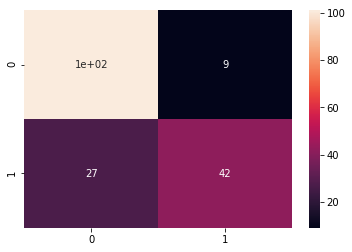

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x_training, y_training)
predicted = rf.predict(x_test)
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7)
model = AdaBoostClassifier(n_estimators=30, random_state=7)
results = model_selection.cross_val_score(model, x_test, y_test, cv=kfold)
print(results.mean())

0.7885620915032681
